# __Classify Images Using Convolutional Neural Networks & Python__

Dataset: 
The CIFAR-10 and CIFAR-100 are labeled subsets of the 80 million tiny images dataset. They were collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
Original dataset can be found here: "https://www.cs.toronto.edu/~kriz/cifar.html".

## Description: This programs classifies images
In this notebook I have used cifar10 dataset availavle on keras.datasets

In [1]:
#Import the libraries
from tensorflow import keras
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


Next, load the data set into the variables x_train (the variable that contains the images to train on) , y_train (the variable that contains the labels of the images in the training set), x_test (the variable that contains the images to test on), and the y_test (the variable that contains the labels of the images in the test set).

In [2]:
# Load the data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## Explore The Data

In [3]:
#Print the data type of x_train
print(type(x_train))
#Print the data type of y_train
print(type(y_train))
#Print the data type of x_test
print(type(x_test))
#Print the data type of y_test
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


The class labels for cifar10 dataset are:
<br>
<br>
<b>Label</b> &nbsp;  <b>Description</b>
<br>
0   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   airplane
<br>
1   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   automobile
<br>
2   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   bird
<br>
3   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   cat
<br>
4   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   deer
<br>
5   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   dog
<br>
6   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   frog
<br>
7   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   horse
<br>
8   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   ship
<br>
9   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   truck
<br>

Get the shape of the x_train , y_train , x_test and y_test data. You will notice that the shape of the x_train data set is a 4-Dimensional array with 50,000 rows of 32 x 32 pixel image with depth = 3 (RGB) where R is Red, G is Green, and B is Blue. The y_train data shape is a 2-Dimensional array with 50,000 rows and 1 column. The shape of the x_test data set is a 4-Dimensional array with 10,000 rows of 32 x 32 pixel image with depth = 3 (RGB). The y_test data shape is a 2-Dimensional array with 10,000 rows and 1 column.

In [4]:
#Get the shape of x_train
print('x_train shape:', x_train.shape) #4D array 50,000 rows 32x32 pixel image with depth = 3 visible wave lenghts (RGB)
#Get the shape of y_train
print('y_train shape:', y_train.shape) #2D array 50,000 rows and 1 column
#Get the shape of x_train
print('x_test shape:', x_test.shape) #4D array 10,000 rows 32x32 pixel image with depth = 3 visible wave lenghts (RGB)
#Get the shape of y_train
print('y_test shape:', y_test.shape) #2D array 10,000 rows and 1 column

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [5]:
#Take a look at the first image (at index=0) in the training data set as a numpy array
#This shows the image as a series of pixel values
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

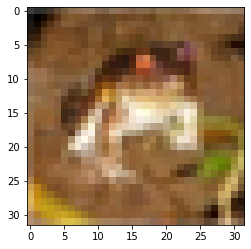

In [6]:
#Show the image as an image instead of a series of pixel values using matplotlib

img = plt.imshow(x_train[0])


In [7]:
x_train[0].shape

(32, 32, 3)

In [8]:
# create a label dictionary
label_dict = {'0': 'airplane', 
              '1': 'automobile', 
              '2': 'bird', 
              '3': 'cat', 
              '4': 'deer', 
              '5': 'dog', 
              '6': 'frog',
              '7': 'horse', 
              '8': 'ship',
              '9': 'truck'}

In [9]:
#Print the label of the image, NOTE: the number 6 = frog

print('The label is:', y_train[0] , "->", label_dict['6'])

The label is: [6] -> frog


Use __One-Hot Encoding__ to convert the labels into a set of 10 numbers to input into the neural network. The numbers of course corresponds with the number of labels to classify the images.

In [10]:
#One-Hot Encoding 
#Convert the labels into a set of 10 numbers to input into the neural network

y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [11]:
#Print all of the new labels in the training data set
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [12]:
#Print an example of the new labels, NOTE: The label 6 = [0,0,0,0,0,0,1,0,0,0]
print('The one hot label is:', y_train_one_hot[0])

The one hot label is: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


__Normalize the pixels__ in the images to be a value between 0 and 1 , they are normally values between 0 and 255, doing this will help the neural network.

In [13]:
#normalize the pixels in the images to be a value between 0 and 1 

x_train = x_train / 255
x_test = x_test / 255

## Build The Convolution Neural Network Model

To build the model we need to create the architecture using Sequential().
We will add the first layer, a convolution layer to extract features from the input image, and create 32 5 x 5 ReLu convoluted features also known as feature maps. Since this is the first layer we must input the dimension shape which is a 32 x 32 pixel image with depth = 3 (RGB).

The next layer will be a pooling layer with a 2 x 2 pixel filter to get the max element from the feature maps. This reduces the dimension of the feature maps by half and is also known as sub sampling.

Add one more convolution layer and pooling layer like before, but without the input_shape.

Add a flattening layer, to reduce the image to a linear array also known as a one 1-Dimension vector to feed into and connect with the neural network.

Now create a neural network where the first layer has 1000 neurons and the activation function ReLu.

Create the last layer of this neural network with 10 neurons (one for each label) using the softmax function.


In [14]:
#Build The CNN

model = Sequential() #Create the architecture

# Convolution layer to extract features from the input image, and create 32 ReLu 5x5 convolved layers 
# Note:You must input the input shape only in this first layer.
# number of output channels or convolution filters = 32
# input shape 32x32 RGB image, so spacially it's 3-Dimensional
# use Rectifier Linear Unit(ReLu) activation function 
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32,32,3))) 


# Pooling layer with a 2x2 filter to get the max element from the convolved features , 
# this reduces the dimensionality by half e.g. 16x16, aka sub sampling

model.add(MaxPooling2D(pool_size=(2, 2)))


# 2nd Convolution layer with 64 channels
model.add(Conv2D(64, (5, 5), activation='relu'))

# Adding second Max Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening, Flattens the input. Does not affect the batch size. 
# (Flattening occurs when you reduce all layers to one background layer), 
# this makes the image a linear array or 1D Array or 1D Vector to 
# feed into or connect with the neural network
model.add(Flatten())
model.add(Dense(1000, activation='relu')) # a layer with 1000 neurons and activation function ReLu
model.add(Dense(10, activation='softmax')) # a layer with 10 output neurons for each label using softmax activation function

### __Compile the model__ 

Compile the model using the loss function sparse_categorical_crossentropywhich is used for classes that are greater than 2, since we will have 10 classes we will use this function. Those classes being the numbers from 0 to 9 for example: 0,1,2,3,…9. I will also add in a metric to show the accuracy of the model. Adam is an optimization algorithm that can used instead of the classical stochastic gradient descent procedure to update network weights on training data.

__Optimization Function:__ A function that seeks to minimize a loss function.

__Loss Function:__ In mathematical optimization and decision theory, a loss function or cost function is a function that maps an event or values of one or more variables onto a real number intuitively representing some “cost” associated with the event. Essentially it is a method of evaluating how well your algorithm models your data set.

In [15]:
model.compile(loss='categorical_crossentropy', # loss function used for classes that are greater than 2)
              optimizer='adam',
              metrics=['accuracy'])

### __Train the model__

Train the model using the fit() method, which is another word for train. We will train the model on the training data with batch size =256, epochs =10, and split the data into training on 70% of the data and using the other 30% as validation. Training may take some time to finish.

__Batch:__ Total number of training examples present in a single batch.

__Epoch:__ The number of iterations when an ENTIRE dataset is passed forward and backward through the neural network only ONCE.

__Fit:__ Another word for train

In [16]:
# NOTE: We don't need to use validation_data, so we didn't have to split the data into a validation sets. 
# We just put in validation_split = 0.2 and this splits the data 20% for us.

hist = model.fit(x_train, y_train_one_hot, 
           batch_size=256, epochs=10, validation_split=0.2 )

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 27s 679us/step - loss: 1.6008 - accuracy: 0.4191 - val_loss: 1.3739 - val_accuracy: 0.5080
Epoch 2/10
40000/40000 [==============================] - 33s 827us/step - loss: 1.2693 - accuracy: 0.5495 - val_loss: 1.1997 - val_accuracy: 0.5797
Epoch 3/10
40000/40000 [==============================] - 36s 893us/step - loss: 1.1164 - accuracy: 0.6069 - val_loss: 1.2273 - val_accuracy: 0.5662
Epoch 4/10
40000/40000 [==============================] - 33s 816us/step - loss: 1.0148 - accuracy: 0.6425 - val_loss: 1.0927 - val_accuracy: 0.6221
Epoch 5/10
40000/40000 [==============================] - 31s 786us/step - loss: 0.9081 - accuracy: 0.6830 - val_loss: 0.9716 - val_accuracy: 0.6653
Epoch 6/10
40000/40000 [==============================] - 32s 791us/step - loss: 0.8183 - accuracy: 0.7155 - val_loss: 0.9916 - val_accuracy: 0.6618
Epoch 7/10
40000/40000 [==============================] 

In [17]:
#Get the models accuracy
model.evaluate(x_test, y_test_one_hot)[1]
#test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 2s 193us/step


0.6776000261306763

__Visualize the models__ accuracy for both the training and validation data.

In [18]:
hist.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

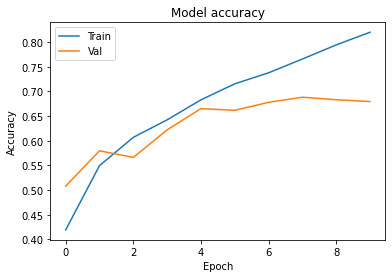

In [19]:
#Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

__Visualize the models__ loss for both the training and validation data.

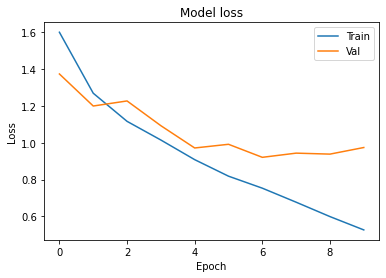

In [20]:
#Visualize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

## __Test The Model__
Load the data that you want to classify from an image file into the variable

In [21]:
#Load the data
my_image = plt.imread("cat.4014.jpg") #Read in the image (3, 14, 20)

([], <a list of 0 Text major ticklabel objects>)

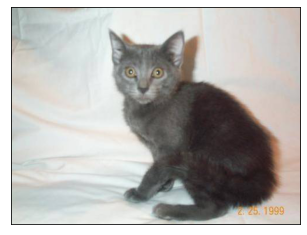

In [22]:
#Show the uploaded image
img = plt.imshow(my_image)
plt.xticks([])
plt.yticks([])

In [23]:
print("Size of uploaded image: ",my_image.shape)

Size of uploaded image:  (375, 499, 3)


([], <a list of 0 Text major ticklabel objects>)

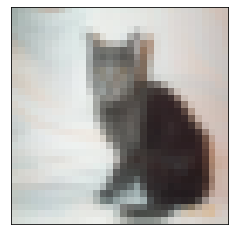

In [24]:
#Resize & Show the image
from skimage.transform import resize
from skimage.transform import resize
my_image_resized = resize(my_image, (32,32,3)) #resize the image to 32x32 pixel with depth = 3
img = plt.imshow(my_image_resized) #show new image
plt.xticks([])
plt.yticks([])

In [25]:
#Get the probabilities for each class
#model.predict function is expecting an array, so we will use np.array to make this transformation on the image
import numpy as np
probabilities = model.predict(np.array( [my_image_resized,] ))

In [26]:
#Show the probability for each class
probabilities

array([[5.5931893e-04, 2.0272640e-07, 5.2684680e-02, 9.3418473e-01,
        7.3978922e-04, 3.2184052e-04, 3.6551376e-04, 8.1366459e-03,
        2.8878693e-03, 1.1935761e-04]], dtype=float32)

In [27]:
# argmax will choose the value having max probability
res = np.argmax(probabilities, axis=1)
res[0,]

3

In [28]:

print("Most likely class:", label_dict[str(res[0,])], "-- Probability:", probabilities[0,res[0,]])

Most likely class: cat -- Probability: 0.93418473
